Predicting the sales of products across stores of a retail chain



In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import sklearn
#importing libraries

In [2]:
path = os.getcwd()
os.chdir(path)
#to get the path

In [3]:
train = pd.read_csv("train_data.csv",header=0)
prod_price = pd.read_csv('product_prices.csv',header=0)
date_week = pd.read_csv('date_to_week_id_map.csv',header=0)
test = pd.read_csv('test_data.csv',header=0)

In [4]:
train.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales
0,2012-01-01,74,11,others,111,Maharashtra,0
1,2012-01-01,337,11,others,111,Maharashtra,1
2,2012-01-01,423,12,others,111,Maharashtra,0
3,2012-01-01,432,12,others,111,Maharashtra,0
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0


In [5]:
test.head()

,id,date,product_identifier,department_identifier,category_of_product,outlet,state
0,1,2014-03-01,74,11,others,111,Maharashtra
1,2,2014-03-01,337,11,others,111,Maharashtra
2,3,2014-03-01,423,12,others,111,Maharashtra
3,4,2014-03-01,432,12,others,111,Maharashtra
4,5,2014-03-01,581,21,fast_moving_consumer_goods,111,Maharashtra


In [6]:
prod_price.head()

,outlet,product_identifier,week_id,sell_price
0,111,74,49,2.94
1,111,74,50,2.94
2,111,74,51,2.94
3,111,74,52,2.94
4,111,74,53,2.94


In [7]:
date_week.head()

,date,week_id
0,2012-01-01,49
1,2012-01-02,49
2,2012-01-03,49
3,2012-01-04,49
4,2012-01-05,49


In [8]:
merge_data = pd.merge(prod_price,date_week,on = ['week_id'],how='inner')
merge_data

,outlet,product_identifier,week_id,sell_price,date
0,111,74,49,2.94,2012-01-01
1,111,74,49,2.94,2012-01-02
2,111,74,49,2.94,2012-01-03
3,111,74,49,2.94,2012-01-04
4,111,74,49,2.94,2012-01-05
...,...,...,...,...,...
410495,333,3008,166,1.98,2014-03-30
410496,333,3008,166,1.98,2014-03-31
410497,333,3021,166,2.08,2014-03-29
410498,333,3021,166,2.08,2014-03-30


In [9]:
train_merge = pd.merge(merge_data,train,on=['date','product_identifier','outlet'],how='inner')
test_merge = pd.merge(merge_data,test,on=['date','product_identifier','outlet'],how='inner')




In [10]:
train_merge

,outlet,product_identifier,week_id,sell_price,date,department_identifier,category_of_product,state,sales
0,111,74,49,2.94,2012-01-01,11,others,Maharashtra,0
1,111,74,49,2.94,2012-01-02,11,others,Maharashtra,0
2,111,74,49,2.94,2012-01-03,11,others,Maharashtra,1
3,111,74,49,2.94,2012-01-04,11,others,Maharashtra,0
4,111,74,49,2.94,2012-01-05,11,others,Maharashtra,0
...,...,...,...,...,...,...,...,...,...
394995,333,3021,161,2.08,2014-02-24,33,drinks_and_food,Kerala,0
394996,333,3021,161,2.08,2014-02-25,33,drinks_and_food,Kerala,0
394997,333,3021,161,2.08,2014-02-26,33,drinks_and_food,Kerala,0
394998,333,3021,161,2.08,2014-02-27,33,drinks_and_food,Kerala,0


In [11]:
test_merge

,outlet,product_identifier,week_id,sell_price,date,id,department_identifier,category_of_product,state
0,111,74,162,3.43,2014-03-01,1,11,others,Maharashtra
1,111,74,162,3.43,2014-03-02,501,11,others,Maharashtra
2,111,74,162,3.43,2014-03-03,1001,11,others,Maharashtra
3,111,74,162,3.43,2014-03-04,1501,11,others,Maharashtra
4,111,74,162,3.43,2014-03-05,2001,11,others,Maharashtra
...,...,...,...,...,...,...,...,...,...
15495,333,3008,166,1.98,2014-03-30,14999,33,drinks_and_food,Kerala
15496,333,3008,166,1.98,2014-03-31,15499,33,drinks_and_food,Kerala
15497,333,3021,166,2.08,2014-03-29,14500,33,drinks_and_food,Kerala
15498,333,3021,166,2.08,2014-03-30,15000,33,drinks_and_food,Kerala


In [12]:
train_merge.shape

(395000, 9)

In [13]:
test_merge.shape

(15500, 9)

Visualization

In [14]:
import matplotlib.pyplot as plt

In [15]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column] , dataset['sales'])
    plt.ylabel('sales')
    plt.xlabel(column)

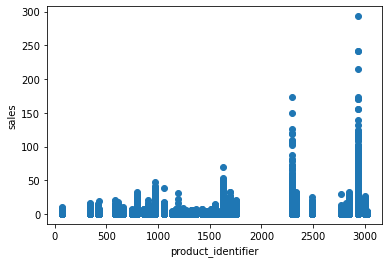

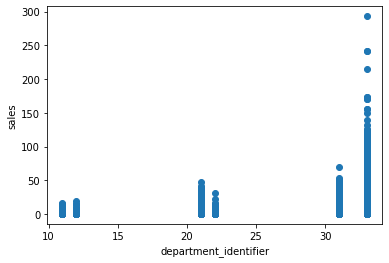

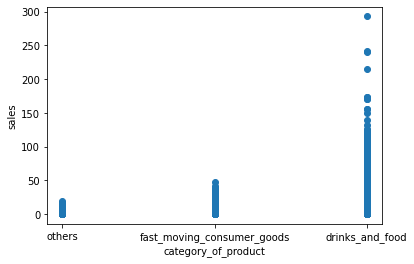

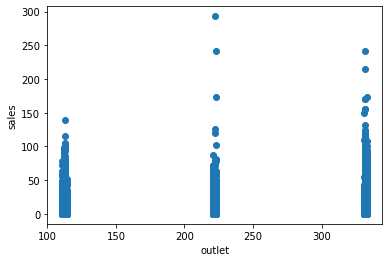

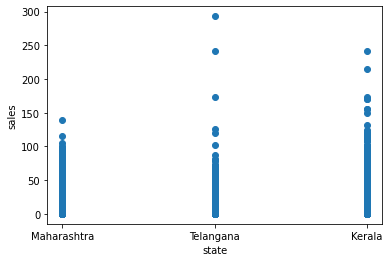

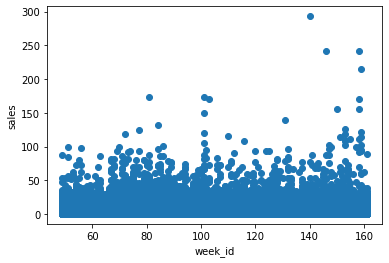

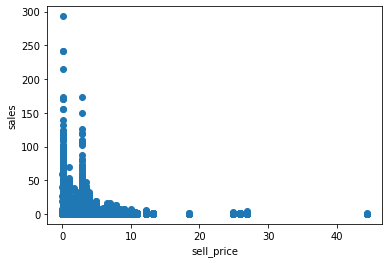

In [16]:
scatter(train_merge, 'product_identifier')
scatter(train_merge, 'department_identifier')
scatter(train_merge, 'category_of_product')
scatter(train_merge, 'outlet')
scatter(train_merge, 'state')
scatter(train_merge, 'week_id')
scatter(train_merge, 'sell_price')

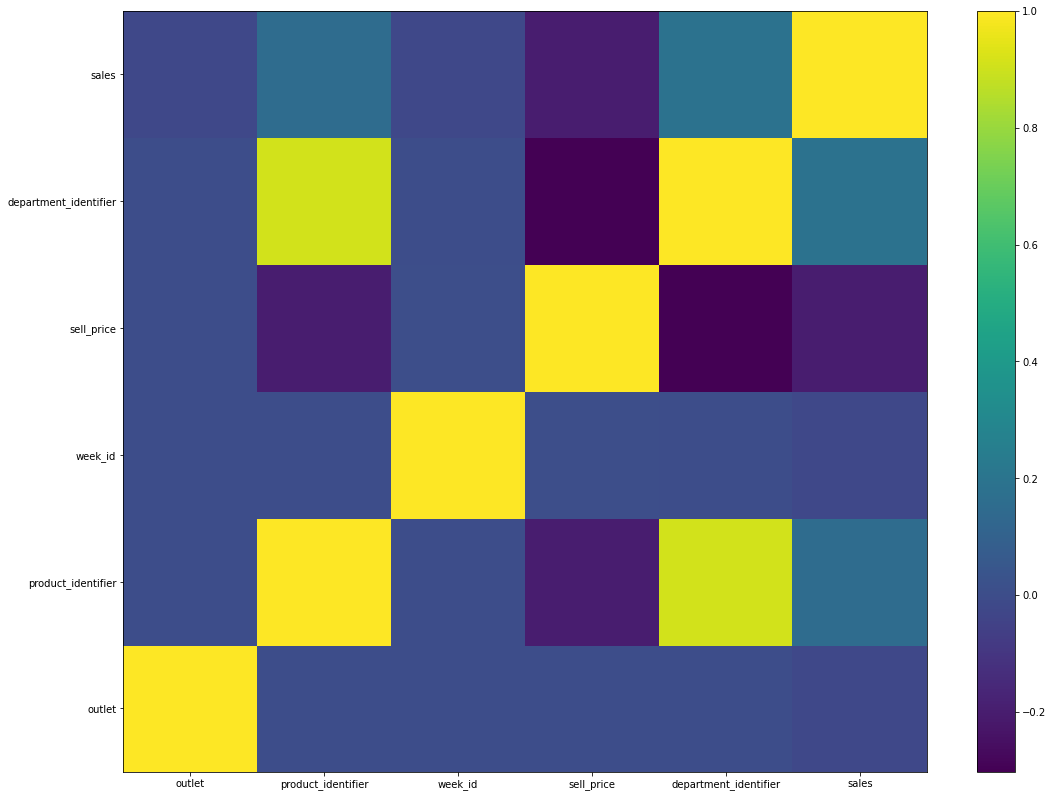

In [17]:
fig = plt.figure(figsize=(18, 14))
corr = train_merge.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

In [18]:
train_merge.dtypes

outlet                     int64
product_identifier         int64
week_id                    int64
sell_price               float64
date                      object
department_identifier      int64
category_of_product       object
state                     object
sales                      int64
dtype: object

In [19]:
test_merge.dtypes

outlet                     int64
product_identifier         int64
week_id                    int64
sell_price               float64
date                      object
id                         int64
department_identifier      int64
category_of_product       object
state                     object
dtype: object

In [20]:
train_merge.nunique()

outlet                    10
product_identifier        50
week_id                  113
sell_price               107
date                     790
department_identifier      6
category_of_product        3
state                      3
sales                    126
dtype: int64

In [21]:
test_merge.nunique()

outlet                      10
product_identifier          50
week_id                      5
sell_price                  51
date                        31
id                       15500
department_identifier        6
category_of_product          3
state                        3
dtype: int64

In [22]:
test_merge.drop(['id'],axis=1)

,outlet,product_identifier,week_id,sell_price,date,department_identifier,category_of_product,state
0,111,74,162,3.43,2014-03-01,11,others,Maharashtra
1,111,74,162,3.43,2014-03-02,11,others,Maharashtra
2,111,74,162,3.43,2014-03-03,11,others,Maharashtra
3,111,74,162,3.43,2014-03-04,11,others,Maharashtra
4,111,74,162,3.43,2014-03-05,11,others,Maharashtra
...,...,...,...,...,...,...,...,...
15495,333,3008,166,1.98,2014-03-30,33,drinks_and_food,Kerala
15496,333,3008,166,1.98,2014-03-31,33,drinks_and_food,Kerala
15497,333,3021,166,2.08,2014-03-29,33,drinks_and_food,Kerala
15498,333,3021,166,2.08,2014-03-30,33,drinks_and_food,Kerala


In [23]:
train_merge.isnull().sum()

outlet                   0
product_identifier       0
week_id                  0
sell_price               0
date                     0
department_identifier    0
category_of_product      0
state                    0
sales                    0
dtype: int64

In [24]:
test_merge.isnull().sum()

outlet                   0
product_identifier       0
week_id                  0
sell_price               0
date                     0
id                       0
department_identifier    0
category_of_product      0
state                    0
dtype: int64

In [25]:
x_train= train_merge.drop(['sales'],axis=1)
y_train = train_merge['sales']

In [26]:
test_merge['sales']=train_merge['sales']

In [27]:
test_merge

,outlet,product_identifier,week_id,sell_price,date,id,department_identifier,category_of_product,state,sales
0,111,74,162,3.43,2014-03-01,1,11,others,Maharashtra,0
1,111,74,162,3.43,2014-03-02,501,11,others,Maharashtra,0
2,111,74,162,3.43,2014-03-03,1001,11,others,Maharashtra,1
3,111,74,162,3.43,2014-03-04,1501,11,others,Maharashtra,0
4,111,74,162,3.43,2014-03-05,2001,11,others,Maharashtra,0
...,...,...,...,...,...,...,...,...,...,...
15495,333,3008,166,1.98,2014-03-30,14999,33,drinks_and_food,Kerala,3
15496,333,3008,166,1.98,2014-03-31,15499,33,drinks_and_food,Kerala,1
15497,333,3021,166,2.08,2014-03-29,14500,33,drinks_and_food,Kerala,0
15498,333,3021,166,2.08,2014-03-30,15000,33,drinks_and_food,Kerala,1


In [28]:
x_train

,outlet,product_identifier,week_id,sell_price,date,department_identifier,category_of_product,state
0,111,74,49,2.94,2012-01-01,11,others,Maharashtra
1,111,74,49,2.94,2012-01-02,11,others,Maharashtra
2,111,74,49,2.94,2012-01-03,11,others,Maharashtra
3,111,74,49,2.94,2012-01-04,11,others,Maharashtra
4,111,74,49,2.94,2012-01-05,11,others,Maharashtra
...,...,...,...,...,...,...,...,...
394995,333,3021,161,2.08,2014-02-24,33,drinks_and_food,Kerala
394996,333,3021,161,2.08,2014-02-25,33,drinks_and_food,Kerala
394997,333,3021,161,2.08,2014-02-26,33,drinks_and_food,Kerala
394998,333,3021,161,2.08,2014-02-27,33,drinks_and_food,Kerala


In [29]:
test_merge

,outlet,product_identifier,week_id,sell_price,date,id,department_identifier,category_of_product,state,sales
0,111,74,162,3.43,2014-03-01,1,11,others,Maharashtra,0
1,111,74,162,3.43,2014-03-02,501,11,others,Maharashtra,0
2,111,74,162,3.43,2014-03-03,1001,11,others,Maharashtra,1
3,111,74,162,3.43,2014-03-04,1501,11,others,Maharashtra,0
4,111,74,162,3.43,2014-03-05,2001,11,others,Maharashtra,0
...,...,...,...,...,...,...,...,...,...,...
15495,333,3008,166,1.98,2014-03-30,14999,33,drinks_and_food,Kerala,3
15496,333,3008,166,1.98,2014-03-31,15499,33,drinks_and_food,Kerala,1
15497,333,3021,166,2.08,2014-03-29,14500,33,drinks_and_food,Kerala,0
15498,333,3021,166,2.08,2014-03-30,15000,33,drinks_and_food,Kerala,1


In [30]:
x_test=test_merge.drop(['sales'],axis=1)
y_test=test_merge['sales']

In [31]:
train_merge.columns

Index(['outlet', 'product_identifier', 'week_id', 'sell_price', 'date',
       'department_identifier', 'category_of_product', 'state', 'sales'],
      dtype='object')

In [32]:
cat_cols=['category_of_product','state']
num_cols=['month', 'product_identifier', 'department_identifier','outlet','sell_price']

In [33]:
train_merge[cat_cols]=train_merge[cat_cols].astype('category')
test_merge[cat_cols]=test_merge[cat_cols].astype('category')

In [34]:
print(train_merge.dtypes)
print(test_merge.dtypes)

outlet                      int64
product_identifier          int64
week_id                     int64
sell_price                float64
date                       object
department_identifier       int64
category_of_product      category
state                    category
sales                       int64
dtype: object
outlet                      int64
product_identifier          int64
week_id                     int64
sell_price                float64
date                       object
id                          int64
department_identifier       int64
category_of_product      category
state                    category
sales                       int64
dtype: object


In [35]:
train_merge['month']=pd.to_datetime(train_merge['date']).dt.month
test_merge['month']=pd.to_datetime(test_merge['date']).dt.month

In [36]:
train_merge.nunique()

outlet                    10
product_identifier        50
week_id                  113
sell_price               107
date                     790
department_identifier      6
category_of_product        3
state                      3
sales                    126
month                     12
dtype: int64

In [37]:
train_merge.dtypes

outlet                      int64
product_identifier          int64
week_id                     int64
sell_price                float64
date                       object
department_identifier       int64
category_of_product      category
state                    category
sales                       int64
month                       int64
dtype: object

In [38]:
train_merge_update=train_merge.drop(['date','week_id'],axis=1)

In [39]:
test_merge_update=test_merge.drop(['date','week_id'],axis=1)

In [40]:
train_merge_update

,outlet,product_identifier,sell_price,department_identifier,category_of_product,state,sales,month
0,111,74,2.94,11,others,Maharashtra,0,1
1,111,74,2.94,11,others,Maharashtra,0,1
2,111,74,2.94,11,others,Maharashtra,1,1
3,111,74,2.94,11,others,Maharashtra,0,1
4,111,74,2.94,11,others,Maharashtra,0,1
...,...,...,...,...,...,...,...,...
394995,333,3021,2.08,33,drinks_and_food,Kerala,0,2
394996,333,3021,2.08,33,drinks_and_food,Kerala,0,2
394997,333,3021,2.08,33,drinks_and_food,Kerala,0,2
394998,333,3021,2.08,33,drinks_and_food,Kerala,0,2


In [41]:
test_merge_update

,outlet,product_identifier,sell_price,id,department_identifier,category_of_product,state,sales,month
0,111,74,3.43,1,11,others,Maharashtra,0,3
1,111,74,3.43,501,11,others,Maharashtra,0,3
2,111,74,3.43,1001,11,others,Maharashtra,1,3
3,111,74,3.43,1501,11,others,Maharashtra,0,3
4,111,74,3.43,2001,11,others,Maharashtra,0,3
...,...,...,...,...,...,...,...,...,...
15495,333,3008,1.98,14999,33,drinks_and_food,Kerala,3,3
15496,333,3008,1.98,15499,33,drinks_and_food,Kerala,1,3
15497,333,3021,2.08,14500,33,drinks_and_food,Kerala,0,3
15498,333,3021,2.08,15000,33,drinks_and_food,Kerala,1,3


In [42]:
x_train=train_merge_update.drop(['sales'],axis=1)
y_train=train_merge_update['sales']

In [43]:
x_test=test_merge_update.drop(['sales'],axis=1)
y_test=test_merge_update['sales']

converting categorical to numerical


One Hot Encoder

In [44]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe.fit(x_train[cat_cols])
ohe.fit(x_test[cat_cols])

x_train_ohe = ohe.transform(x_train[cat_cols]).toarray()
x_test_ohe = ohe.transform(x_test[cat_cols]).toarray()

standardizing numericals

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train[num_cols])
scaler.fit(x_test[num_cols])

x_train_ss = scaler.transform(x_train[num_cols])
x_test_ss = scaler.transform(x_test[num_cols])

In [46]:
x_train_ss

array([[-2.        , -1.77323126, -2.12374707, -1.09915212, -0.52795335],
       [-2.        , -1.77323126, -2.12374707, -1.09915212, -0.52795335],
       [-2.        , -1.77323126, -2.12374707, -1.09915212, -0.52795335],
       ...,
       [-1.        ,  1.86594568,  1.34745914,  1.33609509, -0.74962772],
       [-1.        ,  1.86594568,  1.34745914,  1.33609509, -0.74962772],
       [-1.        ,  1.86594568,  1.34745914,  1.33609509, -0.74962772]])

In [47]:
x_train_ohe.shape

(395000, 6)

In [48]:
x_test_ohe.shape

(15500, 6)

In [49]:
x_train_ss.shape

(395000, 5)

In [50]:
x_test_ss.shape

(15500, 5)

concatenate num_cols and cat_cols


In [51]:
x_train_con=np.concatenate([x_train_ohe,x_train_ss],axis=1)
x_test_con=np.concatenate([x_test_ohe,x_test_ss],axis=1)

In [52]:
x_train_con.shape

(395000, 11)

linear regression

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr=LinearRegression()
lr.fit(x_train_con,y_train)

LinearRegression()

In [55]:
trainpreds_lr=lr.predict(x_train_con)
testpreds_lr=lr.predict(x_test_con)

error metrics


In [56]:
from math import sqrt
def evaluate(act,pred):
    from sklearn.metrics import mean_absolute_error,mean_squared_error
    print('MAE:',mean_absolute_error(act,pred))
    print('MSE:',mean_squared_error(act,pred))
    print('RMSE',sqrt(mean_squared_error(act,pred)))

In [57]:
evaluate(y_train,trainpreds_lr)

MAE: 1.5233178463706487
MSE: 12.03120150047088
RMSE 3.468602240164023


dataframe for error metrics

In [58]:
cols=['model','train_MAE','train_MSE','train_RMSE','test_MAE','test_MSE','test_RMSE']
performance=pd.DataFrame(columns=cols)

In [59]:
def add_to_perf(df,model,train_act,train_pred,test_act,test_pred):
  from sklearn.metrics import mean_absolute_error,mean_squared_error
  train_mae=mean_absolute_error(train_act,train_pred)
  test_mae=mean_absolute_error(test_act,test_pred)
  train_mse=mean_squared_error(train_act,train_pred)
  test_mse=mean_squared_error(test_act,test_pred)
  train_rmse=sqrt(mean_squared_error(train_act,train_pred))
  test_rmse=sqrt(mean_squared_error(test_act,test_pred))
  df=df.append(pd.Series([model,train_mae,train_mse,train_rmse,test_mae,test_mse,test_rmse],index=df.columns),ignore_index=True)
  return df

In [60]:
performance=add_to_perf(performance,'Linear Reg',y_train,trainpreds_lr,y_test,testpreds_lr)

In [61]:
performance

,model,train_MAE,train_MSE,train_RMSE,test_MAE,test_MSE,test_RMSE
0,Linear Reg,1.523318,12.031202,3.468602,1.837299,12.048093,3.471036


random forest regressor


In [62]:
from sklearn.ensemble import RandomForestRegressor
Reg1 = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [63]:
Reg1.fit(x_train_con, y_train)

RandomForestRegressor(random_state=0)

In [64]:
train_pred_rf = Reg1.predict(x_train_con)
test_pred_rf = Reg1.predict(x_test_con)

In [65]:
print("--Train--")
evaluate(y_train, train_pred_rf)
print("--Test--")
evaluate(y_test, test_pred_rf)

--Train--
MAE: 1.0215498046018954
MSE: 7.484845458906209
RMSE 2.73584456044312
--Test--
MAE: 1.8685904443267332
MSE: 14.990524612810017
RMSE 3.871759885738011


In [66]:
performance=add_to_perf(performance,'random forest',y_train,train_pred_rf,y_test,test_pred_rf)

In [67]:
performance

,model,train_MAE,train_MSE,train_RMSE,test_MAE,test_MSE,test_RMSE
0,Linear Reg,1.523318,12.031202,3.468602,1.837299,12.048093,3.471036
1,random forest,1.021550,7.484845,2.735845,1.868590,14.990525,3.871760


decision Tree'

In [68]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [69]:
dtr.fit(x_train_con, y_train)

DecisionTreeRegressor()

In [70]:
train_pred_dtr = dtr.predict(x_train_con)
test_pred_dtr = dtr.predict(x_test_con)

In [71]:
print("--Train--")
evaluate(y_train, train_pred_dtr)
print("--Test--")
evaluate(y_test, test_pred_dtr)

--Train--
MAE: 1.0214091021895995
MSE: 7.482260762990556
RMSE 2.7353721434186165
--Test--
MAE: 1.8672481139979418
MSE: 15.02196220842254
RMSE 3.8758176180546138


In [72]:
performance=add_to_perf(performance,'decisionTree',y_train,train_pred_dtr,y_test,test_pred_dtr)

In [73]:
performance

,model,train_MAE,train_MSE,train_RMSE,test_MAE,test_MSE,test_RMSE
0,Linear Reg,1.523318,12.031202,3.468602,1.837299,12.048093,3.471036
1,random forest,1.021550,7.484845,2.735845,1.868590,14.990525,3.871760
2,decisionTree,1.021409,7.482261,2.735372,1.867248,15.021962,3.875818


In [74]:
from sklearn.ensemble import GradientBoostingRegressor

In [75]:
gbr = GradientBoostingRegressor()

In [76]:
gbr.fit(x_train_con, y_train)

GradientBoostingRegressor()

In [77]:
train_pred_gbr = gbr.predict(x_train_con)
test_pred_gbr = gbr.predict(x_test_con)

In [78]:
print("--Train--")
evaluate(y_train, train_pred_gbr)
print("--Test--")
evaluate(y_test, test_pred_gbr)

--Train--
MAE: 1.2037834939935161
MSE: 8.727690515387144
RMSE 2.9542664936303806
--Test--
MAE: 1.8926004603454973
MSE: 14.421747453035648
RMSE 3.7975975896658203


In [79]:
performance=add_to_perf(performance,'GradientDescent',y_train,train_pred_gbr,y_test,test_pred_gbr)

In [80]:
performance

,model,train_MAE,train_MSE,train_RMSE,test_MAE,test_MSE,test_RMSE
0,Linear Reg,1.523318,12.031202,3.468602,1.837299,12.048093,3.471036
1,random forest,1.021550,7.484845,2.735845,1.868590,14.990525,3.871760
2,decisionTree,1.021409,7.482261,2.735372,1.867248,15.021962,3.875818
3,GradientDescent,1.203783,8.727691,2.954266,1.892600,14.421747,3.797598


final prediction


In [95]:
pred= test_merge.copy()

In [96]:
pred.columns

Index(['outlet', 'product_identifier', 'week_id', 'sell_price', 'date', 'id',
       'department_identifier', 'category_of_product', 'state', 'sales',
       'month'],
      dtype='object')

In [97]:
pred_update= pred.drop(['outlet', 'product_identifier', 'week_id',
                      'sell_price', 'date','department_identifier',
                      'category_of_product', 'state','month'],axis=1)
pred_update

,id,sales
0,1,0
1,501,0
2,1001,1
3,1501,0
4,2001,0
...,...,...
15495,14999,3
15496,15499,1
15497,14500,0
15498,15000,1


In [98]:
df = pd.DataFrame(testpreds_lr, columns= ['sales'])
df

,sales
0,1.091431
1,1.091431
2,1.091431
3,1.091431
4,1.091431
...,...
15495,2.349854
15496,2.349854
15497,2.350464
15498,2.350464


In [99]:
df['id'] =pred_update['id']

In [100]:
first_column = df.pop('id')
df.insert(0,'id',first_column)

In [101]:
df

,id,sales
0,1,1.091431
1,501,1.091431
2,1001,1.091431
3,1501,1.091431
4,2001,1.091431
...,...,...
15495,14999,2.349854
15496,15499,2.349854
15497,14500,2.350464
15498,15000,2.350464


In [108]:
df.sort_values(['id'],ascending=True,inplace=True,na_position='first')

In [110]:
df.to_csv('/content/Meduri Sarva Venkata_Sai Praneeth_b108A_MiTH.csv')